<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/TS_Zinc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d yasserh/imf-zinc-price-forecast-dataset
! unzip '/content/imf-zinc-price-forecast-dataset.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.time_series import *
#from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [4]:
ds_df = pd.read_csv("/content/data/zinc.csv")

In [5]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    434 non-null    object 
 1   Price   434 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [8]:
ds_df["Date"] = pd.to_datetime(ds_df["Date"])

In [13]:
ds_df

,Date,Price
0,1980-01-01,773.82
1,1980-02-01,868.62
2,1980-03-01,740.75
3,1980-04-01,707.68
4,1980-05-01,701.07
...,...,...
429,2015-10-01,1724.34
430,2015-11-01,1583.31
431,2015-12-01,1527.79
432,2016-01-01,1520.36


<Axes: >

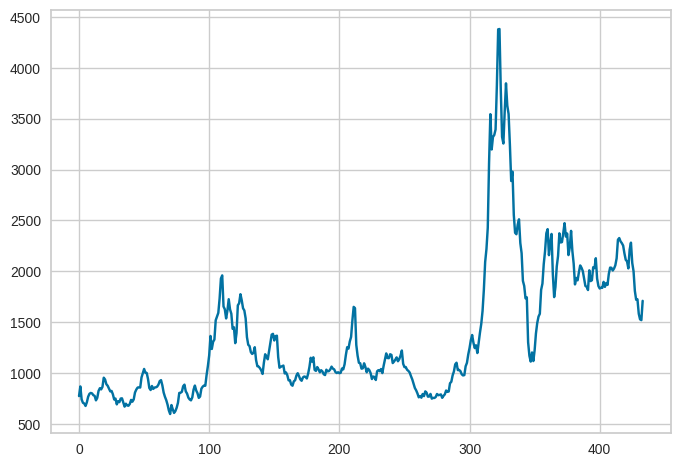

In [12]:
ds_df["Price"].plot()


# II. Preprocessing

In [122]:
'''train_df, test_df = train_test_split(
    ds_df, test_size=0.20, stratify=ds_df["Action"], random_state=1)'''

# III. Create Models

In [10]:
s = setup(ds_df, target="Price", fh = 36, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Price
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(434, 2)"
5,Transformed data shape,"(434, 2)"
6,Transformed train set shape,"(398, 2)"
7,Transformed test set shape,"(36, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [11]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,434.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,1362.338594
3,Summary,Statistics,Transformed,Median,,1088.875
4,Summary,Statistics,Transformed,Standard Deviation,,677.071321
5,Summary,Statistics,Transformed,Variance,,458425.5741
6,Summary,Statistics,Transformed,Kurtosis,,3.050141
7,Summary,Statistics,Transformed,Skewness,,1.651358
8,Summary,Statistics,Transformed,# Distinct Values,,411.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",5063.051189


In [14]:
best_model = compare_models()


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,4.5832,4.0082,787.8062,1011.0475,0.3885,0.3465,-1.0058,1.4567
croston,Croston,4.6166,4.0222,775.2424,986.1050,0.3755,0.3786,-0.8904,0.0500
grand_means,Grand Means Forecaster,5.4165,4.6172,988.9201,1238.0428,0.3976,0.5362,-7.3465,0.0367
snaive,Seasonal Naive Forecaster,5.6658,4.6971,986.6830,1222.1123,0.4974,0.4298,-2.3282,0.0567
stlf,STLF,6.4916,5.1791,1169.5899,1408.9895,0.5939,0.4560,-4.6553,0.0867


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [15]:
holdout_pred = predict_model(best_model)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,0.8859,0.6852,214.8603,265.6873,0.1184,0.1085,-0.5018


In [16]:
holdout_pred

,y_pred
398,2128.69
399,2128.69
400,2128.69
401,2128.69
402,2128.69
403,2128.69
404,2128.69
405,2128.69
406,2128.69
407,2128.69
